In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/WineQT.csv
/kaggle/input/wine-quality-dataset/WineQT.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df=pd.read_csv('/kaggle/input/wine-quality/WineQT.csv')

# Data Cleaning

In [4]:
# Display the first 5 rows  of dataframe df
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
# Dropping id column
df = df.drop(columns=['Id'])

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#Returning the number of missing values in each column of df
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Exploration

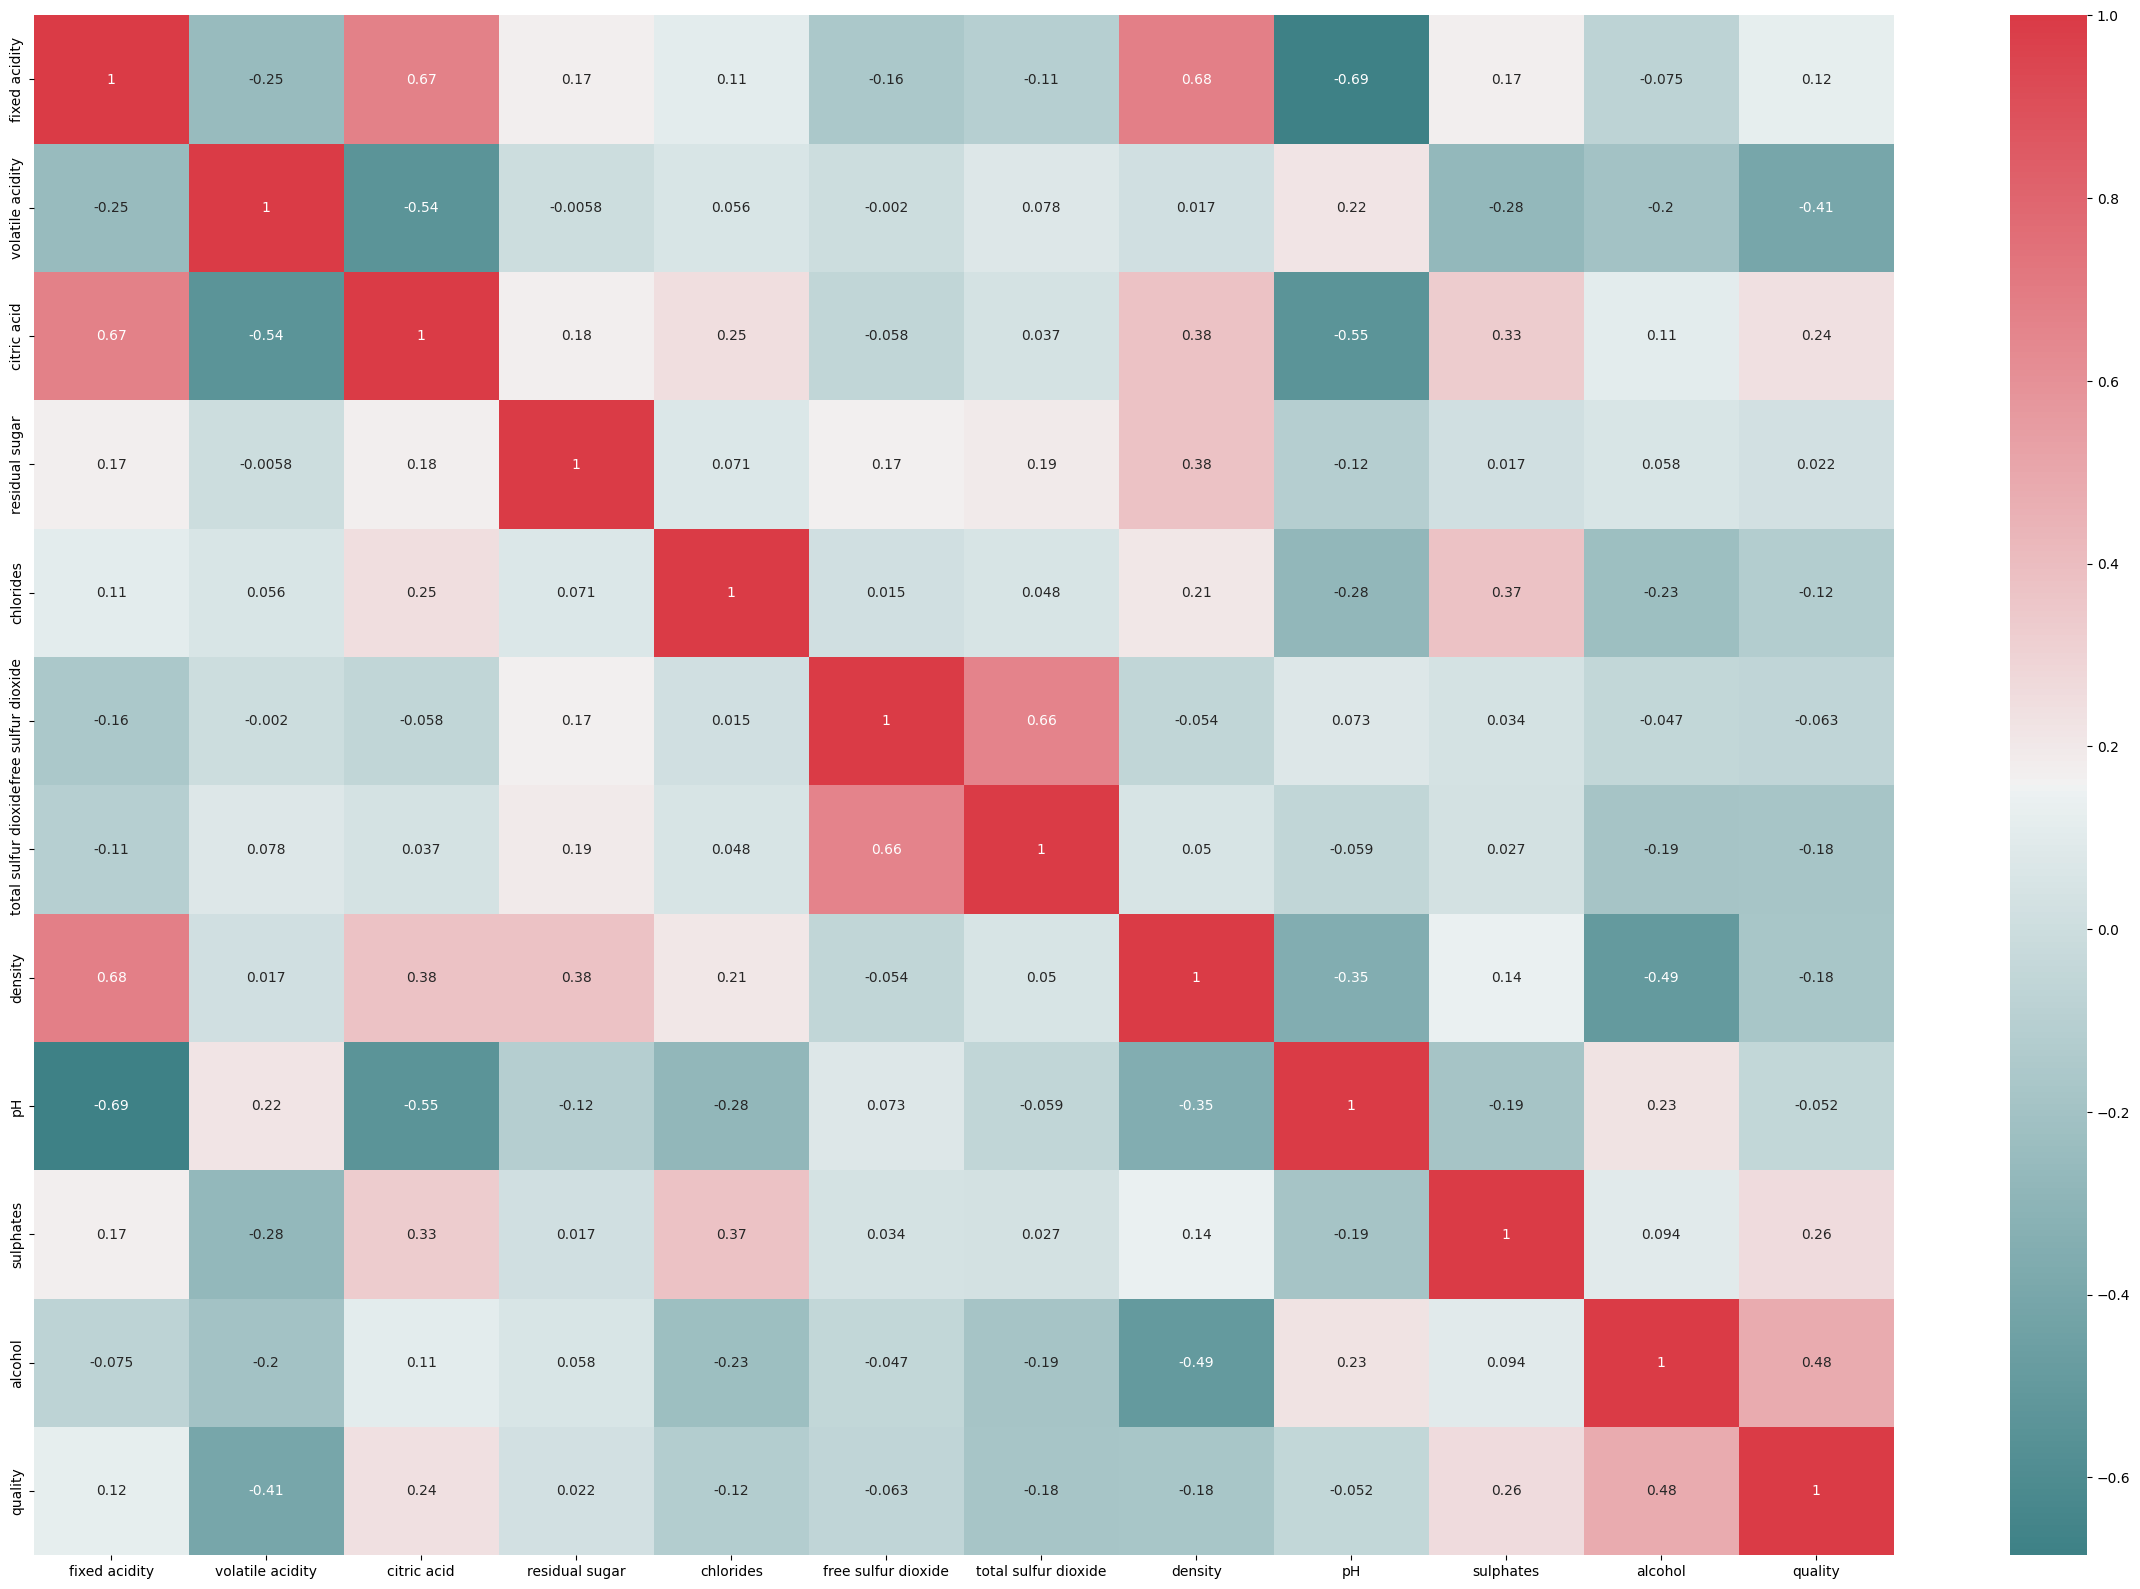

In [8]:
#Correlation matrix to see correlation between features
#Interested in correlation between quality and other features
#Correlation matrix using seaborn heatmap function
plt.figure(figsize=(30,20))
corr=df.corr()
sb.heatmap(corr,annot=True,cmap=sb.diverging_palette(200,10,as_cmap=True))
plt.show()

In [9]:
#From graph we can see that alcohol is strongly correlaated with quality and correlation is positive

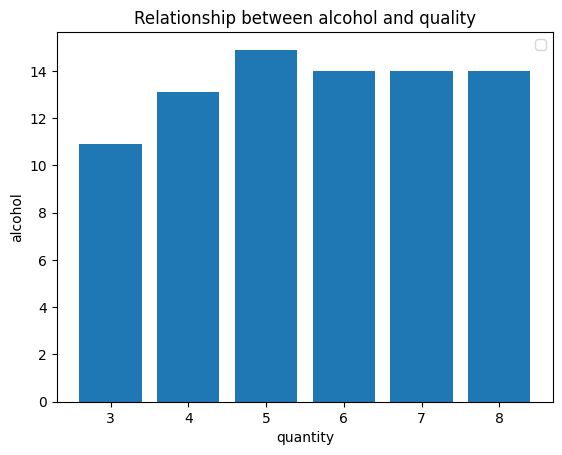

In [10]:
# Alcohol levels for wines for different qualities using Matplotlib bar graph
plt.bar(df['quality'],df['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quantity')
plt.ylabel('alcohol')
plt.legend()
plt.show()

In [11]:
# Wines of lower quality tend to have lower level of alcohol. But it doesnt show casual relationship, so want to further know top 3 important properties that make good wine.

# Normalizing the Dataset

In [12]:
# MinMaxScaler scales your data to a specified range, in this case between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
normal_df=scaler.fit_transform(df)
normal_df=pd.DataFrame(normal_df,columns=df.columns)
print(normal_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149254              0.098940  0.567548  0.606299   0.137725   
1             0.358209              0.215548  0.494126  0.362205   0.209581   
2             0.208955              0.169611  0.508811  0.409449   0.191617   
3             0.238806              0.190813  0.582232  0.330709   0.149701   
4             0.149254              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

# Adding New Column

In [13]:
# Creating a new column good wine in df called good wine. It categorizes wines as yes if quality above 7 and no otherwise.
df["good wine"]=["yes" if i>=7 else "no" for i in df['quality']]

# Identifying the Features and the Label

In [14]:
# Splitting features and label
X=normal_df.drop(["quality"],axis=1)
y=df["good wine"]

In [15]:
#Return the count of unique values in your y Series
y.value_counts()

good wine
no     984
yes    159
Name: count, dtype: int64

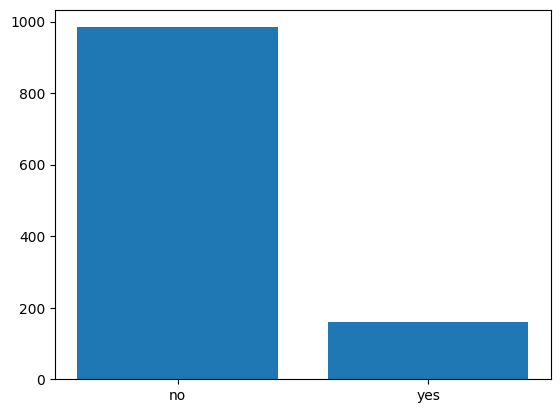

In [16]:
# Visualize the counts using Matplotlib bar graph
counts = y.value_counts()
plt.bar(counts.index, counts.values)
plt.show()

# Train and test Splitting (Modeling)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

# Baseline Classification

In [18]:
# Baseline to serve as benchmark for future comparisons
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=2020)
dummy_classifier.fit(X_train,y_train)
acc_baseline = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", acc_baseline)

Baseline Accuracy =  0.8600583090379009


# Support Vector Classifier Model

In [19]:
# Fit the training data to model 
from sklearn.svm import SVC
s = SVC(random_state=2020)
s.fit(X_train, y_train)

SVC(random_state=2020)

In [20]:
# Predict and accuracy score
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_pred = s.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
# SVM Accuracy =  0.880466472303207

0.880466472303207


# Check for Overfitting

In [21]:
# cross_val_score function to estimate the expected accuracy of the model on out-of-training data.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(s, X, y, cv=5)
print(scores.mean())
# Cross validation score: 0.8634911514594347

0.8634911514594347


In [22]:
# Accuracy score on training data
y_pred_train = s.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))
# Training accuracy: 0.89125
#Since the training accuracy (0.89) and the cross validation score (0.86) are close, we can conclude that no overfitting occurs.

0.89125


In [23]:
# Tune the Model’s Parameters:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {"C": [0.001,0.01,0.1,1,10,100,1000]}
s_random = RandomizedSearchCV(s,random_grid,cv=5,random_state=2020)
s_random.fit(X_train, y_train)
print(s_random.best_params_)

{'C': 100}


In [24]:
# GridSearchCV to do exhaustive search to find the best parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [80, 90, 100, 110, 120],
              'kernel': ['linear', 'rbf', 'poly']}
s_cv = GridSearchCV(s, param_grid, cv=10)
s_cv.fit(X_train, y_train)
print(s_cv.best_params_)

{'C': 120, 'kernel': 'rbf'}


In [25]:
s_new = SVC(C = 120, kernel = "rbf", random_state = 2020)
s_new.fit(X_train, y_train)
y_pred_new = s_new.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_new))

0.8658892128279884


In [26]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3, random_state=2020)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_sgd))
# The accuracy increased from 0.880466472303207 to 0.8833819241982507

0.8833819241982507


In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_new))
# 273 “good” wines were correctly classified (True Positives)
# 22 “good” wines were incorrectly classified as “not good” (False Negatives)
# 24 “not good” wines were incorrectly classified as “good” (False Positives)
# 24 “not good” wines were correctly classified (True Negatives)

[[273  22]
 [ 24  24]]


In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(s_new, X, y, cv=5)
print("Cross-Validation Accuracy Scores", scores)
# The cross-validation scores are quite consistent and relatively high, ranging from approximately 78.17% to 89.52%

Cross-Validation Accuracy Scores [0.89519651 0.78165939 0.88209607 0.84210526 0.82894737]


# Random Forest Classifier Model

In [29]:
# Fit the training data to model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 2020)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=2020)

In [30]:
# Predict the outcomes for test set and print accuracy score
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)
# RFC accuracy = 0.9154518950437318

Accuracy =  0.9154518950437318


In [31]:
scores = cross_val_score(rf, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())
# Cross Validation Score:  0.8680466300940439

Cross Validation Score:  0.8801156822186471


In [32]:
# Current parameters
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2020, 'verbose': 0, 'warm_start': False}


In [33]:
# RandomizedSearchCV to try out a wide range of values for n_estimators and max depth.
random_grid = {'max_depth': [1, 5, 10, 15],
'n_estimators': [100,200,300,400,500,600]}
rf_random = RandomizedSearchCV(rf,random_grid, n_iter = 50, cv = 5,random_state = 2020)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

{'n_estimators': 400, 'max_depth': 10}


In [34]:
# GridSearchCV for exhaustive search to find the best max_depth and n_estimators
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [80, 90, 100, 110, 120],
    'n_estimators': [400, 500, 600, 700, 800]
}
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 80, 'n_estimators': 800}


In [35]:
rf_opt = RandomForestClassifier(max_depth=80, n_estimators=800, random_state=2020)
rf_opt.fit(X_train, y_train)
y_pred_rf_opt = rf_opt.predict(X_test)
print('Optimized RandomForestClassifier Accuracy = ', metrics.accuracy_score(y_test, y_pred_rf_opt))
# Optimized RandomForestClassifier Accuracy =  0.9154518950437318

Optimized RandomForestClassifier Accuracy =  0.9154518950437318


In [36]:
# Calculate descriptive statistics for density and fixed acidity columns within each group of quality
print(df.groupby('quality')['density'].describe())
print(df.groupby('quality')['fixed acidity'].describe())

         count      mean       std      min       25%       50%       75%  \
quality                                                                     
3          6.0  0.997682  0.002218  0.99476  0.996263  0.997565  0.999070   
4         33.0  0.996669  0.001734  0.99340  0.995650  0.996640  0.997600   
5        483.0  0.997073  0.001637  0.99256  0.996100  0.996920  0.997950   
6        462.0  0.996610  0.002002  0.99007  0.995385  0.996520  0.997868   
7        143.0  0.996071  0.002292  0.99064  0.994690  0.995680  0.997355   
8         16.0  0.995553  0.002217  0.99170  0.994430  0.995580  0.997225   

             max  
quality           
3        1.00080  
4        1.00100  
5        1.00315  
6        1.00369  
7        1.00320  
8        0.99880  
         count      mean       std  min   25%   50%     75%   max
quality                                                          
3          6.0  8.450000  2.032486  6.7  7.15  7.45   9.700  11.6
4         33.0  7.809091  1.68566

In [37]:
# Calculate the correlation of density and fixed acidity with wine quality
print(df[['density', 'fixed acidity', 'quality']].corr()['quality'])

density         -0.175208
fixed acidity    0.121970
quality          1.000000
Name: quality, dtype: float64


In [38]:
# Calculate descriptive statistics for density and volatile acidity columns within each group of quality
print(df.groupby('quality')['density'].describe())
print(df.groupby('quality')['volatile acidity'].describe())

         count      mean       std      min       25%       50%       75%  \
quality                                                                     
3          6.0  0.997682  0.002218  0.99476  0.996263  0.997565  0.999070   
4         33.0  0.996669  0.001734  0.99340  0.995650  0.996640  0.997600   
5        483.0  0.997073  0.001637  0.99256  0.996100  0.996920  0.997950   
6        462.0  0.996610  0.002002  0.99007  0.995385  0.996520  0.997868   
7        143.0  0.996071  0.002292  0.99064  0.994690  0.995680  0.997355   
8         16.0  0.995553  0.002217  0.99170  0.994430  0.995580  0.997225   

             max  
quality           
3        1.00080  
4        1.00100  
5        1.00315  
6        1.00369  
7        1.00320  
8        0.99880  
         count      mean       std   min     25%     50%      75%   max
quality                                                                
3          6.0  0.897500  0.367556  0.58  0.6475  0.8175  0.95375  1.58
4         33.0 

In [39]:
#Calculate the correlation of density and volatile acidity with wine quality
print(df[['density', 'volatile acidity', 'quality']].corr()['quality'])

density            -0.175208
volatile acidity   -0.407394
quality             1.000000
Name: quality, dtype: float64


In [40]:
print(df[['alcohol', 'volatile acidity', 'sulphates','quality']].corr()['quality'])

alcohol             0.484866
volatile acidity   -0.407394
sulphates           0.257710
quality             1.000000
Name: quality, dtype: float64


# Final Model Decision

In [41]:
# The final accuracy on testing dataset of the SVC model is 0.883.
# The final accuracy on testing dataset of the random forest model is 0.915.
# Since the random forest model has the highest accuracy, I choose the random forest model as our final model to use.

# Feature Importance

In [42]:
# Let’s calculate the top 3 important features from the random forest model.
imp_rf = pd.DataFrame(zip(X_train.columns, rf.feature_importances_),columns = ["feature", "importance"])
imp_rf.set_index("feature", inplace=True)
imp_rf.sort_values(by = "importance", ascending = False, inplace = True)
imp_rf.head()

,importance
feature,
alcohol,0.161317
volatile acidity,0.137760
sulphates,0.104186
density,0.092756
citric acid,0.092749


In [43]:
# Top 3 important properties are alcohol, volatile acidity, and sulphates. 

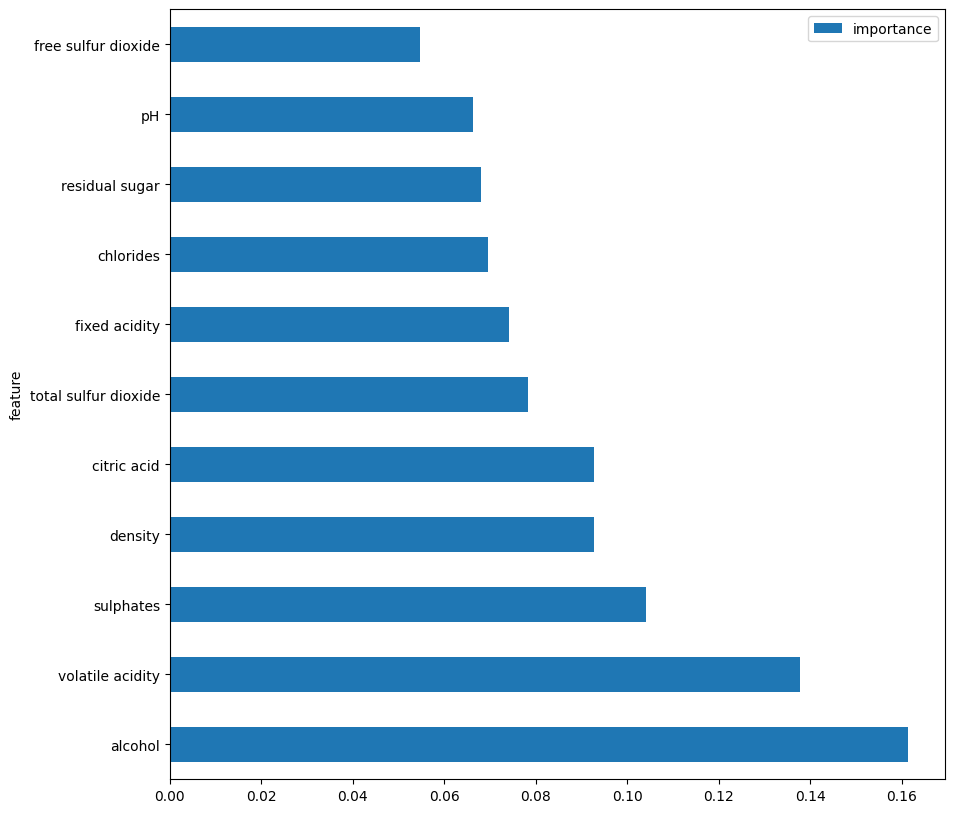

In [44]:
# Horizontal bar graph to visualize the feature importances.
imp_rf.plot.barh(figsize=(10,10))
plt.show()

# Conclusion

In [45]:
# Let’s compare the difference in alcoholic levels for good wine and regular wine through average 

In [46]:
import numpy as np
print(np.average(df[df["good wine"] == "yes"].alcohol))
print(np.average(df[df["good wine"] == "no"].alcohol))
# Thus, wines of good quality have higher levels of alcohol on average.

11.528406708595389
10.266581978319785


In [47]:
# Compare the difference in sulphates for good wine and regular wine through average 

In [48]:
print(np.average(df[df["good wine"] == "yes"].sulphates))
print(np.average(df[df["good wine"] == "no"].sulphates))
# Thus, wines of good quality have higher levels of sulphates on average.

0.7458490566037737
0.6434654471544716


In [49]:
# Compare the difference in volatile acidity for good wine and regular wine through average

In [50]:
df_good = df[df["good wine"] == "yes"]
df_bad = df[df["good wine"] == "no"]
print(np.average(df_good["volatile acidity"]))
print(np.average(df_bad["volatile acidity"]))
# Thus, wines of good quality have lower levels of volatile acidity on average.

0.395314465408805
0.5533180894308942


In [51]:
# In conclusion, alcohol, volatile acidity, and sulphates are the top 3 important properties that can make a wine good. Good quality wines have higher levels of alcohol on average, lower levels of volatile acidity on average, and higher levels of sulphates on average.